# Biased and Unbiased Fractals

Finding a phase transition.

exponent =  0.9445505247111408


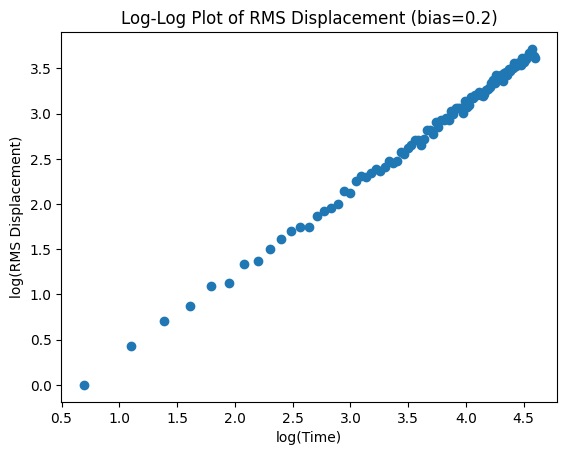

In [ ]:
import jax
import jax.numpy as jnp
from jax import random
import matplotlib.pyplot as plt
import scipy.stats as stats

def random_walk_only_last(key, bias=0.0, time=100):
    p_right = 0.5 + bias
    p_left = 1 - p_right
    
    subkeys = random.split(key, time - 1)
    steps = random.choice(subkeys[0], jnp.array([-1, 1]), shape=(time - 1,), p=jnp.array([p_left, p_right]))
    
    position = jnp.sum(steps)
    return position

def find_slope(bias, time_range=100, N=100):
    key = random.PRNGKey(0)
    x_meansquare = []
    t = []
    
    for time in range(1, time_range):
        t.append(time)
        x_square = 0.0
        
        for n in range(N):
            key, subkey = random.split(key)
            ind = random_walk_only_last(subkey, bias=bias, time=time)
            x_square += float(ind)**2
        
        x_meansquare.append(x_square / N)
    
    x_rms = jnp.sqrt(jnp.array(x_meansquare))
    log_x_rms = jnp.log(x_rms[1:])
    log_t = jnp.log(jnp.array(t[1:]))

    plt.scatter(log_t, log_x_rms)
    plt.title(f'Log-Log Plot of RMS Displacement (bias={bias})')
    plt.xlabel('log(Time)')
    plt.ylabel('log(RMS Displacement)')
    slope, intercept, r, p, std_err = stats.linregress(log_t, log_x_rms)
    return slope

print('exponent = ', find_slope(bias=0.2, time_range=100, N=100))